In [14]:
#%reset

import numpy as np
import matplotlib.pyplot as plt

from sympy import *
from sympy.plotting import plot3d

import holoviews as hv
hv.extension('matplotlib')

from numba import vectorize, float64

init_printing()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
v, B, m = symbols('v B m')
p1, p2, p3 = symbols('p1 p2 p3')

In [3]:
A1 = Matrix([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
A2 = Matrix([[0, 0, 0, -I], [0, 0, I, 0], [0, -I, 0, 0], [I, 0, 0, 0]])
A3 = Matrix([[0, 0, 1, 0], [0, 0, 0, -1], [1, 0, 0, 0], [0, -1, 0, 0]])
Beta = diag(1, 1, -1, -1)

H = v * (p1 * A1 + p2 * A2 + p3 * A3) + (m * v**2 - B * (p1**2 + p2**2 + p3**2)) * Beta

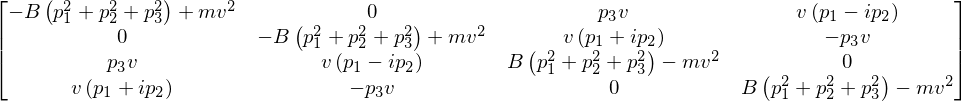

In [4]:
H

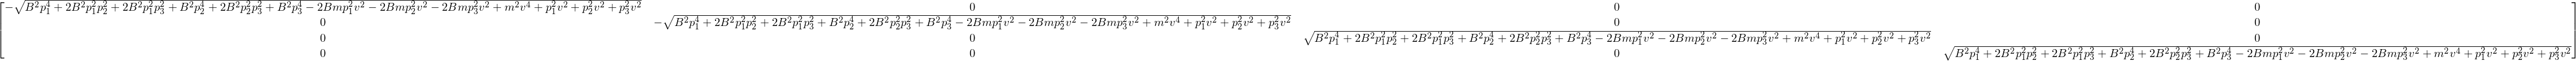

In [5]:
S, E = H.diagonalize()
E

In [9]:
#print(latex(simplify(S)), latex(simplify(E)))
print(H.eigenvects())
print(latex(H.eigenvects()))

[(-sqrt(B**2*p1**4 + 2*B**2*p1**2*p2**2 + 2*B**2*p1**2*p3**2 + B**2*p2**4 + 2*B**2*p2**2*p3**2 + B**2*p3**4 - 2*B*m*p1**2*v**2 - 2*B*m*p2**2*v**2 - 2*B*m*p3**2*v**2 + m**2*v**4 + p1**2*v**2 + p2**2*v**2 + p3**2*v**2), 2, [Matrix([
[         -p3*v/(-B*(p1**2 + p2**2 + p3**2) + m*v**2 + sqrt(B**2*p1**4 + 2*B**2*p1**2*p2**2 + 2*B**2*p1**2*p3**2 + B**2*p2**4 + 2*B**2*p2**2*p3**2 + B**2*p3**4 - 2*B*m*p1**2*v**2 - 2*B*m*p2**2*v**2 - 2*B*m*p3**2*v**2 + m**2*v**4 + p1**2*v**2 + p2**2*v**2 + p3**2*v**2))],
[-v*(p1 + I*p2)/(-B*(p1**2 + p2**2 + p3**2) + m*v**2 + sqrt(B**2*p1**4 + 2*B**2*p1**2*p2**2 + 2*B**2*p1**2*p3**2 + B**2*p2**4 + 2*B**2*p2**2*p3**2 + B**2*p3**4 - 2*B*m*p1**2*v**2 - 2*B*m*p2**2*v**2 - 2*B*m*p3**2*v**2 + m**2*v**4 + p1**2*v**2 + p2**2*v**2 + p3**2*v**2))],
[                                                                                                                                                                                                                                

### Let's try with 1d case:

In [7]:
@vectorize([float64(float64, float64)])
def E_neg_1D(M, P1):
    return N(E[0, 0].subs(m, M).subs(p1, P1).subs(p2, 0).subs(p3, 0).subs(B, 1).subs(v, 1))

@vectorize([float64(float64, float64)])
def E_pos_1D(M, P1):
    return N(E[2, 2].subs(m, M).subs(p1, P1).subs(p2, 0).subs(p3, 0).subs(B, 1).subs(v, 1))

In [8]:
def DR(m0):
    pvals = [-10 + 0.1 * i for i in range(200)]
    return hv.Curve((pvals, [E_neg_1D(m0, p) for p in pvals])) * hv.Curve((pvals, [E_pos_1D(m0, p) for p in pvals]))

ms = np.arange(-10, 11, 1)
dict = {m0: DR(m0) for m0 in ms}

hmap = hv.HoloMap(dict, kdims='m')
hmap

:HoloMap   [m]
   :Overlay
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)

### Spin orientations of the eigenstates

- Eigenstates of eletrons

$$
\left [ \quad \left ( \sqrt{B^{2} p_{1}^{4} + 2 B^{2} p_{1}^{2} p_{2}^{2} + 2 B^{2} p_{1}^{2} p_{3}^{2} + B^{2} p_{2}^{4} + 2 B^{2} p_{2}^{2} p_{3}^{2} + B^{2} p_{3}^{4} - 2 B m p_{1}^{2} v^{2} - 2 B m p_{2}^{2} v^{2} - 2 B m p_{3}^{2} v^{2} + m^{2} v^{4} + p_{1}^{2} v^{2} + p_{2}^{2} v^{2} + p_{3}^{2} v^{2}}, \quad 2, \quad \left [ \left[\begin{matrix}- \frac{p_{3} v}{- B \left(p_{1}^{2} + p_{2}^{2} + p_{3}^{2}\right) + m v^{2} - \sqrt{B^{2} p_{1}^{4} + 2 B^{2} p_{1}^{2} p_{2}^{2} + 2 B^{2} p_{1}^{2} p_{3}^{2} + B^{2} p_{2}^{4} + 2 B^{2} p_{2}^{2} p_{3}^{2} + B^{2} p_{3}^{4} - 2 B m p_{1}^{2} v^{2} - 2 B m p_{2}^{2} v^{2} - 2 B m p_{3}^{2} v^{2} + m^{2} v^{4} + p_{1}^{2} v^{2} + p_{2}^{2} v^{2} + p_{3}^{2} v^{2}}}\\- \frac{v \left(p_{1} + i p_{2}\right)}{- B \left(p_{1}^{2} + p_{2}^{2} + p_{3}^{2}\right) + m v^{2} - \sqrt{B^{2} p_{1}^{4} + 2 B^{2} p_{1}^{2} p_{2}^{2} + 2 B^{2} p_{1}^{2} p_{3}^{2} + B^{2} p_{2}^{4} + 2 B^{2} p_{2}^{2} p_{3}^{2} + B^{2} p_{3}^{4} - 2 B m p_{1}^{2} v^{2} - 2 B m p_{2}^{2} v^{2} - 2 B m p_{3}^{2} v^{2} + m^{2} v^{4} + p_{1}^{2} v^{2} + p_{2}^{2} v^{2} + p_{3}^{2} v^{2}}}\\1\\0\end{matrix}\right], \quad \left[\begin{matrix}- \frac{v \left(p_{1} - i p_{2}\right)}{- B \left(p_{1}^{2} + p_{2}^{2} + p_{3}^{2}\right) + m v^{2} - \sqrt{B^{2} p_{1}^{4} + 2 B^{2} p_{1}^{2} p_{2}^{2} + 2 B^{2} p_{1}^{2} p_{3}^{2} + B^{2} p_{2}^{4} + 2 B^{2} p_{2}^{2} p_{3}^{2} + B^{2} p_{3}^{4} - 2 B m p_{1}^{2} v^{2} - 2 B m p_{2}^{2} v^{2} - 2 B m p_{3}^{2} v^{2} + m^{2} v^{4} + p_{1}^{2} v^{2} + p_{2}^{2} v^{2} + p_{3}^{2} v^{2}}}\\\frac{p_{3} v}{- B \left(p_{1}^{2} + p_{2}^{2} + p_{3}^{2}\right) + m v^{2} - \sqrt{B^{2} p_{1}^{4} + 2 B^{2} p_{1}^{2} p_{2}^{2} + 2 B^{2} p_{1}^{2} p_{3}^{2} + B^{2} p_{2}^{4} + 2 B^{2} p_{2}^{2} p_{3}^{2} + B^{2} p_{3}^{4} - 2 B m p_{1}^{2} v^{2} - 2 B m p_{2}^{2} v^{2} - 2 B m p_{3}^{2} v^{2} + m^{2} v^{4} + p_{1}^{2} v^{2} + p_{2}^{2} v^{2} + p_{3}^{2} v^{2}}}\\0\\1\end{matrix}\right]\right ]\right )\right ]
$$

In [ ]:
Psi1 = Matrix([
[         -p3*v/(-B*(p1**2 + p2**2 + p3**2) + m*v**2 + sqrt(B**2*p1**4 + 2*B**2*p1**2*p2**2 + 2*B**2*p1**2*p3**2 + B**2*p2**4 + 2*B**2*p2**2*p3**2 + B**2*p3**4 - 2*B*m*p1**2*v**2 - 2*B*m*p2**2*v**2 - 2*B*m*p3**2*v**2 + m**2*v**4 + p1**2*v**2 + p2**2*v**2 + p3**2*v**2))],
[-v*(p1 + I*p2)/(-B*(p1**2 + p2**2 + p3**2) + m*v**2 + sqrt(B**2*p1**4 + 2*B**2*p1**2*p2**2 + 2*B**2*p1**2*p3**2 + B**2*p2**4 + 2*B**2*p2**2*p3**2 + B**2*p3**4 - 2*B*m*p1**2*v**2 - 2*B*m*p2**2*v**2 - 2*B*m*p3**2*v**2 + m**2*v**4 + p1**2*v**2 + p2**2*v**2 + p3**2*v**2))],
[                                                                                                                                                                                                                                                                           1],
[                                                                                                                                                                                                                                                                           0]])

Psi1 = simplify(Psi1 / (Psi1.H * Psi1))

X = simplify(Psi1.H * A1 * Psi1)
X

In [ ]:
N((Psi1.H * Psi1).subs(B, 1).subs(p1, 1).subs(p2, 1).subs(p3, 1).subs(v, 1))